# Credit Card Fraud (Mini Project)  




## 1)Practical Motivation

Background:
For some context, due to various factors, including advancements in technology and increasingly sophisticated fraudulent techniques, credit card frauds are on the rise. This has led to a steady increase in losses due to worldwide card fraud, with projections indicating that the value of losses globally could reach $43 billion by 2026, which amounts to about 9.1% of  Singapore’s GDP!



Our problem definition revolves around leveraging statistical modeling and machine learning to enable banks to recognize fraudulent credit card transactions promptly. This proactive approach ensures that customers are not charged for items they did not purchase, ultimately reducing the overall losses incurred. In the machine learning context, we are dealing with a binary classification problem.

## 2)Data Preperation

To address this problem, we will be targeting Europe, utilizing datasets specific to that region. Our dataset contains transactions made by credit cards in September 2013 by European cardholders. The dataset comprises only numerical input variables resulting from a Principal Component Analysis (PCA) transformation. While we cannot provide the original features and more background information about the data due to confidentiality issues, we do know that features V1 to V28 are the principal components obtained with PCA. The 'Time' feature represents the seconds elapsed between each transaction and the first transaction in the dataset, while the 'Amount' feature denotes the transaction amount. The 'Class' feature serves as the response variable, taking the value 1 in cases of fraud and 0 otherwise. 


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import collections


# Other Libraries
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold

# Read the movie data from the CSV file
creditcard = pd.read_csv("creditcard.csv")
creditcard.head()


In [3]:
creditcard.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [4]:
# Find how many Null Values!
creditcard.isnull().sum().max()

0

In [5]:
print('No Frauds:', round(creditcard['Class'].value_counts()[0]/len(creditcard) * 100,2), '% of the dataset')
print('Frauds:', round(creditcard['Class'].value_counts()[1]/len(creditcard) * 100,2), '% of the dataset')

No Frauds: 99.83 % of the dataset
Frauds: 0.17 % of the dataset


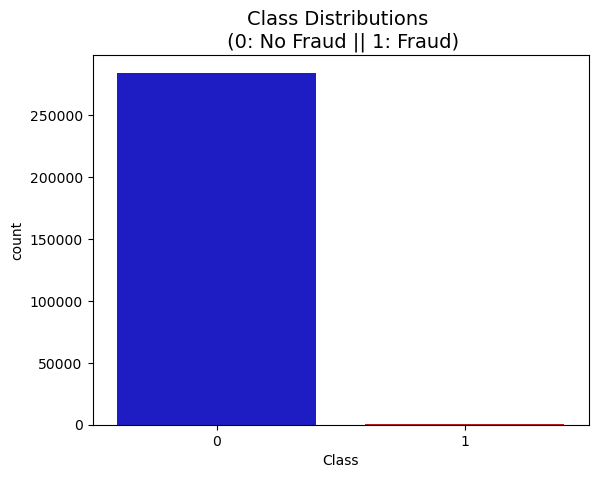

In [5]:
colors = ["#0101DF", "#DF0101"]
sns.countplot(x='Class', data=creditcard, palette=colors, hue='Class', legend=False)
plt.title('Class Distributions \n (0: No Fraud || 1: Fraud)', fontsize=14)
plt.show()


Looking at our creditcard dataset, it looks like the data is skewed. Most of the transactions are non-fraud. If we use this, the predictive models and anylysis we get might have a lot of erros and overfitting will likely occur. However, it is also understandable that credit cards fruad don't oftern happen to a card, thus this dataset is unlikely fake. Thus, to solve this issue we need to find a way/method to tackle the unbalace dataset.


### Dealing with Unbalance Data

SMOTE: Synthetic Minority Oversampling Technique

 We are going to try to apply 2 of the methods we found online that could help, SMOTE and Random UnderSampling Technique.




#### SMOTE

Before SMOTE:
Class
0    284315
1       492
Name: count, dtype: int64
After SMOTE:
Class
0    284315
1    284315
Name: count, dtype: int64
ROC AUC score on training data: 0.9871996638802595
ROC AUC score on testing data: 0.9874498086869017


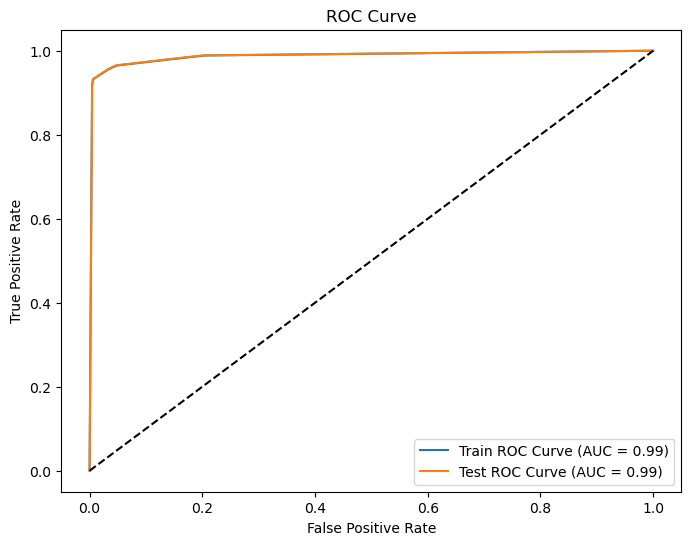

In [6]:
#Applying SMOTE
from sklearn.metrics import roc_auc_score, roc_curve

X = creditcard.drop('Class', axis=1)
y = creditcard['Class']

smote = SMOTE()
X_resampled, y_resampled = smote.fit_resample(X, y)

print("Before SMOTE:")
print(y.value_counts())

print("After SMOTE:")
print(pd.Series(y_resampled).value_counts())

#Using a Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2)

decTree = DecisionTreeClassifier(max_depth = 4) #can change depth if needed
decTree.fit(X_train, y_train)

def getTprFpr(cm):
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    return tpr, fpr

decTree.fit(X_train, y_train)

# Predict probabilities of the positive class for training and testing data
y_train_prob = decTree.predict_proba(X_train)[:, 1]
y_test_prob = decTree.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score for training and testing data
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

print("ROC AUC score on training data:", train_auc)
print("ROC AUC score on testing data:", test_auc)

# Optionally, plot the ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label="Train ROC Curve (AUC = {:.2f})".format(train_auc))
plt.plot(fpr_test, tpr_test, label="Test ROC Curve (AUC = {:.2f})".format(test_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#### RUS

Before RUS:
Class
0    284315
1       492
Name: count, dtype: int64
After RUS:
Class
0    492
1    492
Name: count, dtype: int64
ROC AUC score on training data: 0.9839565975586128
ROC AUC score on testing data: 0.9130030959752321


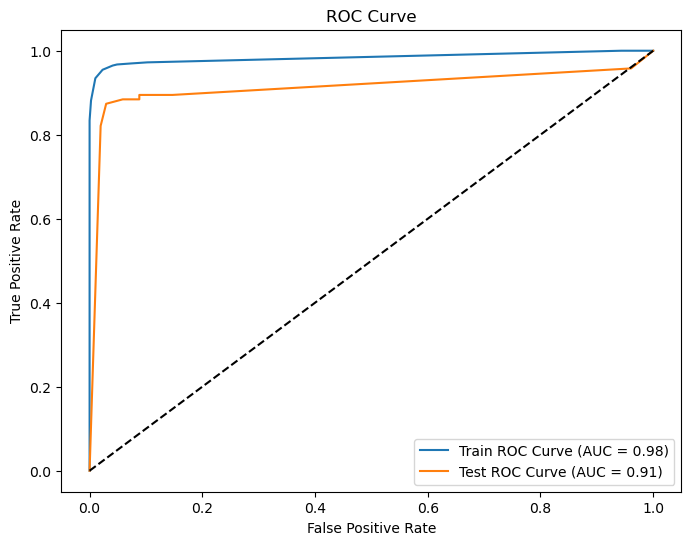

In [7]:
#Applying Random UnderSampling Technique

X = creditcard.drop('Class', axis=1)
y = creditcard['Class']

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=None)

# Apply random undersampling
X_resampled, y_resampled = rus.fit_resample(X, y)

print("Before RUS:")
print(y.value_counts())

print("After RUS:")
print(pd.Series(y_resampled).value_counts())

#Using a Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2)

decTree = DecisionTreeClassifier(max_depth = 4)
decTree.fit(X_train, y_train)

def getTprFpr(cm):
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    return tpr, fpr

decTree.fit(X_train, y_train)

# Predict probabilities of the positive class for training and testing data
y_train_prob = decTree.predict_proba(X_train)[:, 1]
y_test_prob = decTree.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score for training and testing data
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

print("ROC AUC score on training data:", train_auc)
print("ROC AUC score on testing data:", test_auc)

# Optionally, plot the ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label="Train ROC Curve (AUC = {:.2f})".format(train_auc))
plt.plot(fpr_test, tpr_test, label="Test ROC Curve (AUC = {:.2f})".format(test_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#### RUS then SMOTE

Before RUS then SMOTE:
Class
0    284315
1       492
Name: count, dtype: int64
After RUS then SMOTE:
Class
0    492
1    492
Name: count, dtype: int64
ROC AUC score on training data: 0.9769243693134823
ROC AUC score on testing data: 0.8725031210986268


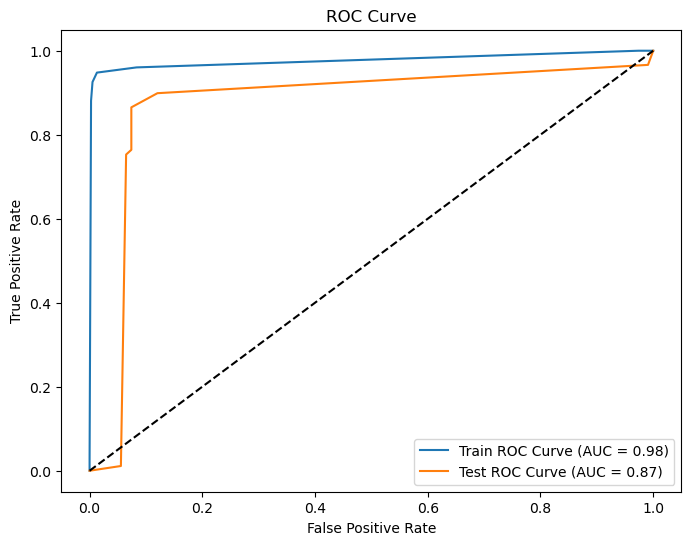

In [8]:
#Applying Random UnderSampling Technique then SMOTE

X = creditcard.drop('Class', axis=1)
y = creditcard['Class']

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=None)

# Apply random undersampling
X_resampled, y_resampled = rus.fit_resample(X, y)
X_resampled, y_resampled = smote.fit_resample(X_resampled, y_resampled)

print("Before RUS then SMOTE:")
print(y.value_counts())

print("After RUS then SMOTE:")
print(pd.Series(y_resampled).value_counts())

#Using a Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2)

decTree = DecisionTreeClassifier(max_depth = 4)
decTree.fit(X_train, y_train)

def getTprFpr(cm):
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    return tpr, fpr

decTree.fit(X_train, y_train)

# Predict probabilities of the positive class for training and testing data
y_train_prob = decTree.predict_proba(X_train)[:, 1]
y_test_prob = decTree.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score for training and testing data
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

print("ROC AUC score on training data:", train_auc)
print("ROC AUC score on testing data:", test_auc)

# Optionally, plot the ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label="Train ROC Curve (AUC = {:.2f})".format(train_auc))
plt.plot(fpr_test, tpr_test, label="Test ROC Curve (AUC = {:.2f})".format(test_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

#### SMOTE then RUS

Before SMOTE then RUS:
Class
0    284315
1       492
Name: count, dtype: int64
After SMOTE then RUS:
Class
0    284315
1    284315
Name: count, dtype: int64
ROC AUC score on training data: 0.9880271585536762
ROC AUC score on testing data: 0.987106655264633


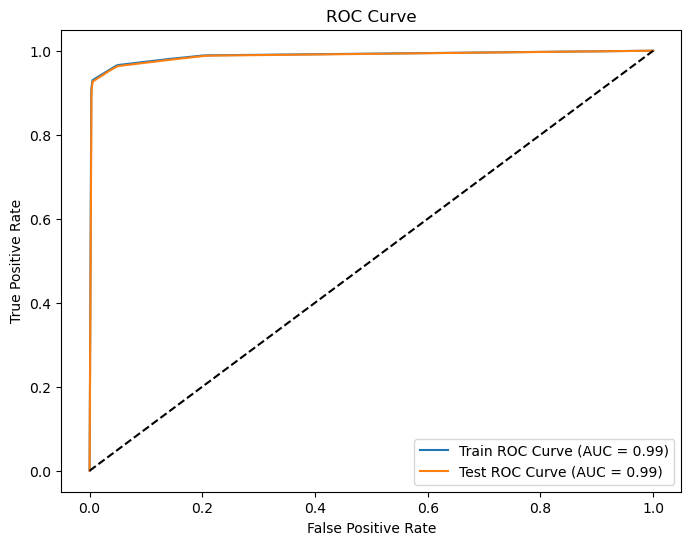

In [9]:
#Applying SMOTE then RUS

X = creditcard.drop('Class', axis=1)
y = creditcard['Class']

# Initialize RandomUnderSampler
rus = RandomUnderSampler(random_state=None)

# Apply random undersampling
X_resampled, y_resampled = smote.fit_resample(X, y)
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

print("Before SMOTE then RUS:")
print(y.value_counts())

print("After SMOTE then RUS:")
print(pd.Series(y_resampled).value_counts())

#Using a Decision Tree
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size = 0.2)

decTree = DecisionTreeClassifier(max_depth = 4)
decTree.fit(X_train, y_train)

def getTprFpr(cm):
    tn, fp, fn, tp = cm.ravel()
    tpr = tp / (tp + fn)
    fpr = fp / (fp + tn)
    return tpr, fpr

decTree.fit(X_train, y_train)

# Predict probabilities of the positive class for training and testing data
y_train_prob = decTree.predict_proba(X_train)[:, 1]
y_test_prob = decTree.predict_proba(X_test)[:, 1]

# Calculate ROC AUC score for training and testing data
train_auc = roc_auc_score(y_train, y_train_prob)
test_auc = roc_auc_score(y_test, y_test_prob)

print("ROC AUC score on training data:", train_auc)
print("ROC AUC score on testing data:", test_auc)

# Optionally, plot the ROC curve
fpr_train, tpr_train, _ = roc_curve(y_train, y_train_prob)
fpr_test, tpr_test, _ = roc_curve(y_test, y_test_prob)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label="Train ROC Curve (AUC = {:.2f})".format(train_auc))
plt.plot(fpr_test, tpr_test, label="Test ROC Curve (AUC = {:.2f})".format(test_auc))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

After different testing, we fount out that the combination of SMOTE followed by RUS has yielded the best results, achieving an ROC score of 1. This is the method we will use for preparing the data before the exploratory analysis.


## 3)Exploratory Analysis


Now lets analyse how each variable V1-V28, time and amount is correlated with the Fruad (class)

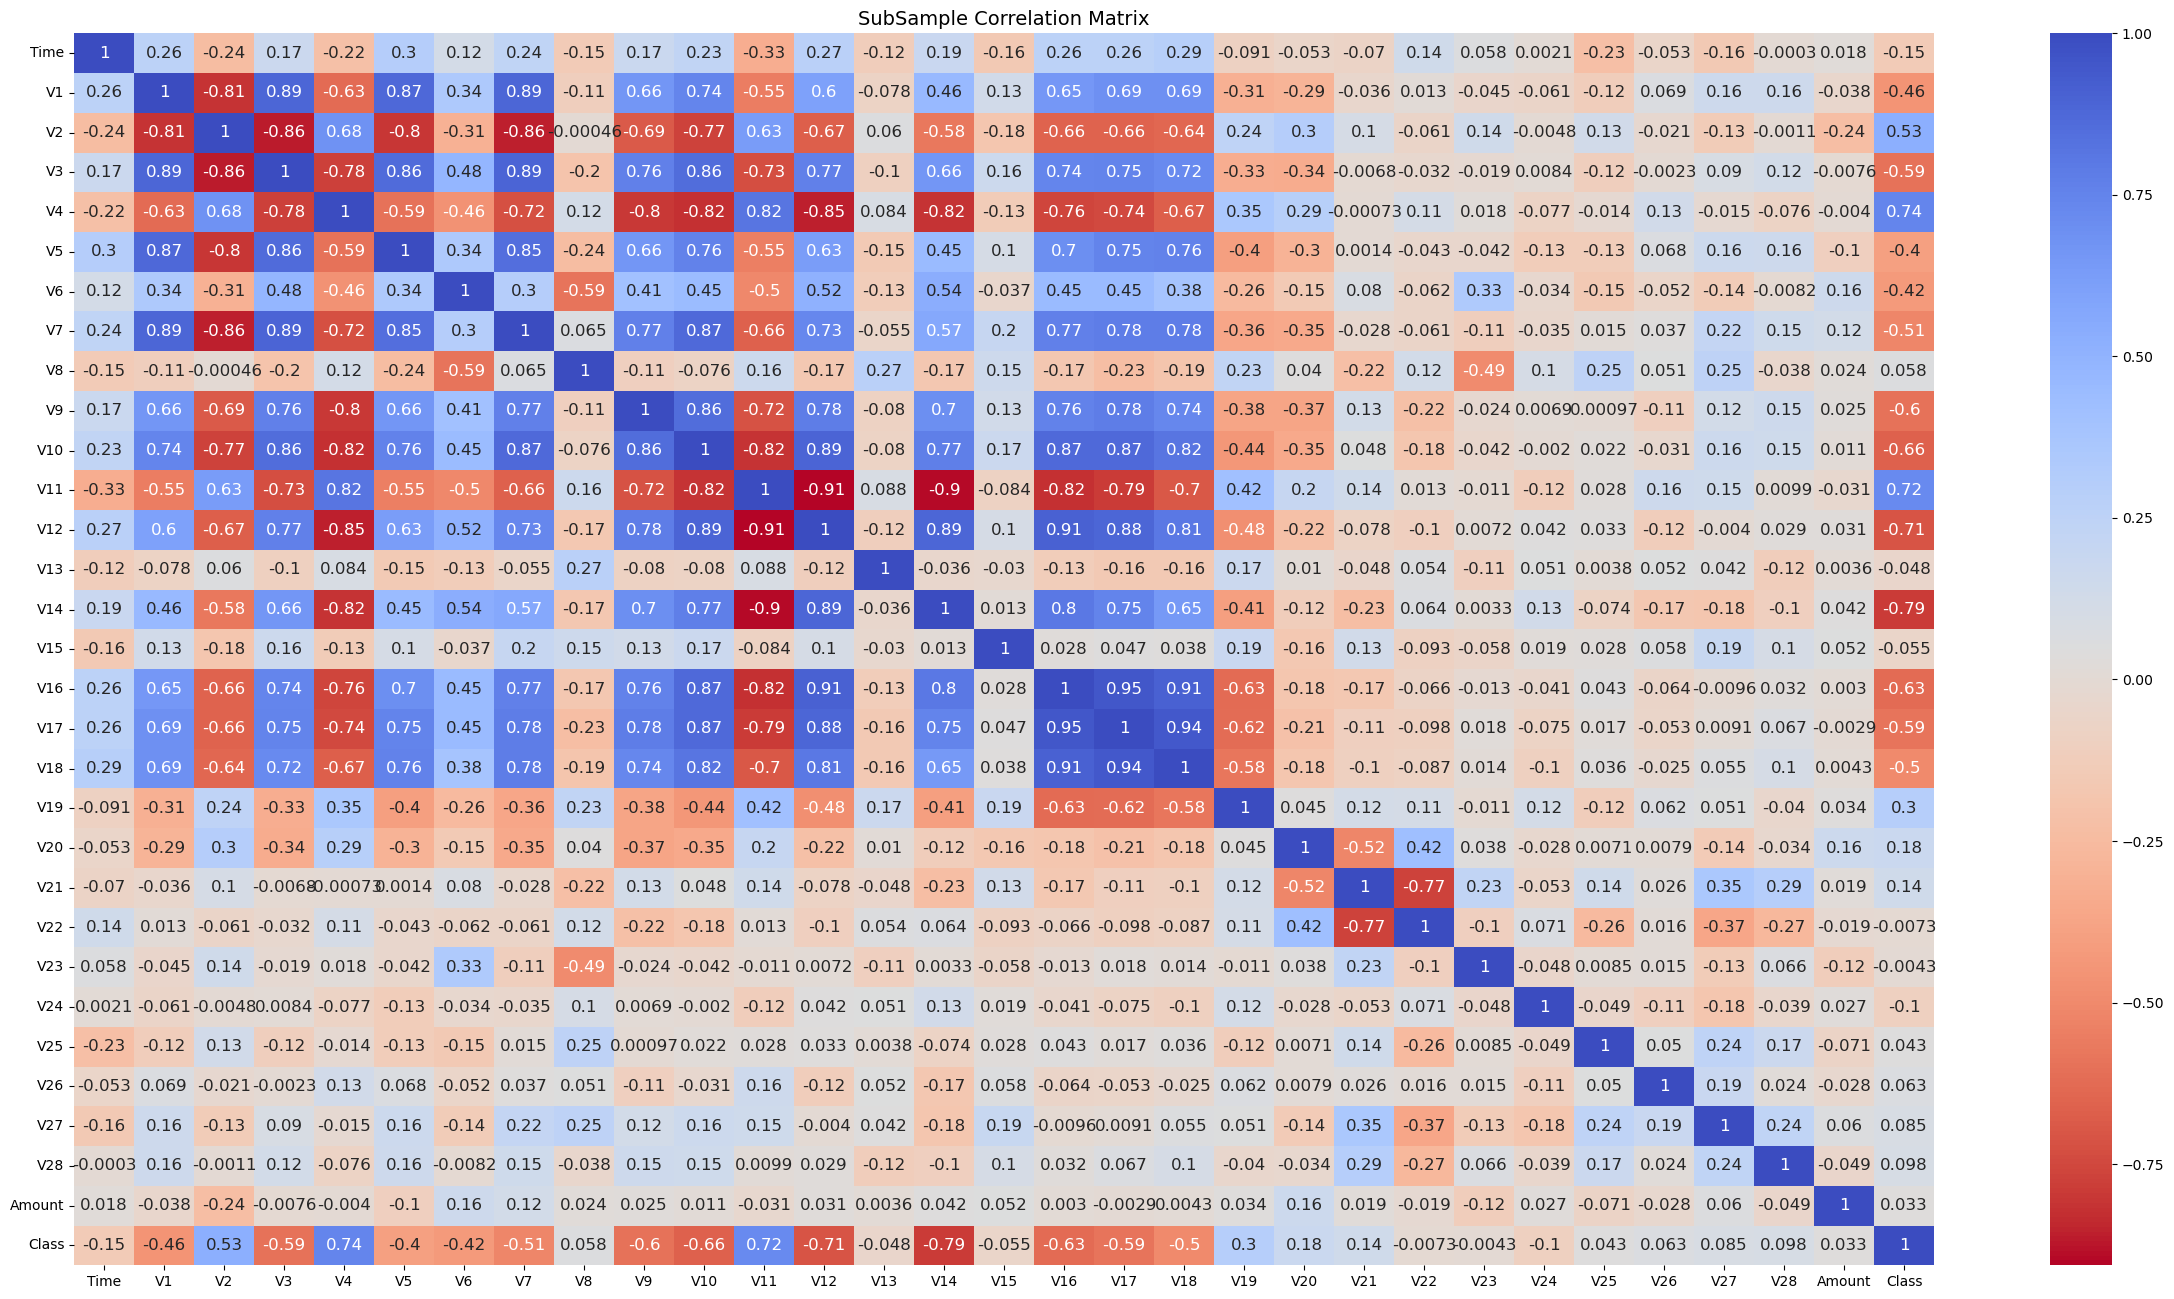

In [10]:
# Resample the data using SMOTE
X_resampled, y_resampled = smote.fit_resample(creditcard.drop(columns=['Class']), creditcard['Class'])

# Further balance the resampled data using RUS
X_resampled, y_resampled = rus.fit_resample(X_resampled, y_resampled)

# Create DataFrame from the resampled data
X_resampled = pd.DataFrame(X_resampled, columns=creditcard.drop(columns=['Class']).columns)
X_resampled['Class'] = y_resampled

# Subsampled DataFrame
sub_sample_corr = X_resampled.corr()

# Plot heatmap
plt.figure(figsize=(30, 16))
sns.heatmap(sub_sample_corr, cmap='coolwarm_r', annot=True, annot_kws={'size': 12})
plt.title('SubSample Correlation Matrix', fontsize=14)
plt.show()

We then plotted the correlation of data against the class to find that the amount and time did not have much impact on the whether or not the transaction was a fraud. Instead, the arbitrary variables of V4,11,2 and 19 had the highest positive correlation whilst the variables of V14,10,16 and 9 had the highest negative correlation.


With this information, we looked further into the highly correlated variables to see the distribution of data points.

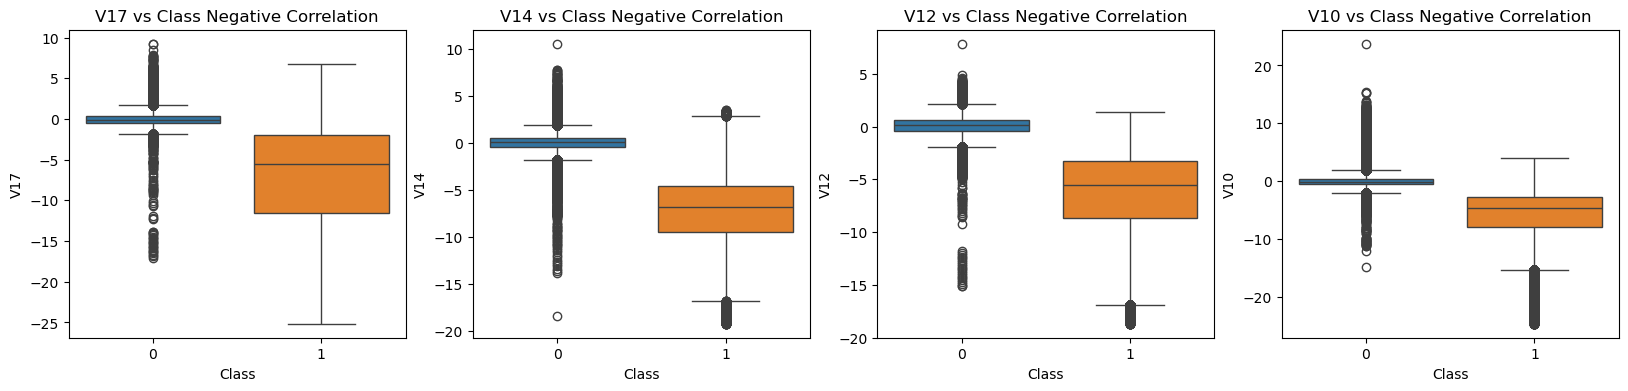

In [11]:
#Plotting Negative Correlation
colors = ["#0101DF", "#DF0101"]
# Negative Correlations with our Class (The lower our feature value the more likely it will be a fraud transaction)
f, axes = plt.subplots(ncols=4, figsize=(20,4))

sns.boxplot(x="Class", y="V17", data=X_resampled, hue="Class", ax=axes[0], legend=False)
axes[0].set_title('V17 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V14", data=X_resampled, hue="Class", ax=axes[1], legend=False)
axes[1].set_title('V14 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V12", data=X_resampled, hue="Class", ax=axes[2], legend=False)
axes[2].set_title('V12 vs Class Negative Correlation')

sns.boxplot(x="Class", y="V10", data=X_resampled, hue="Class", ax=axes[3], legend=False)
axes[3].set_title('V10 vs Class Negative Correlation')

plt.show()

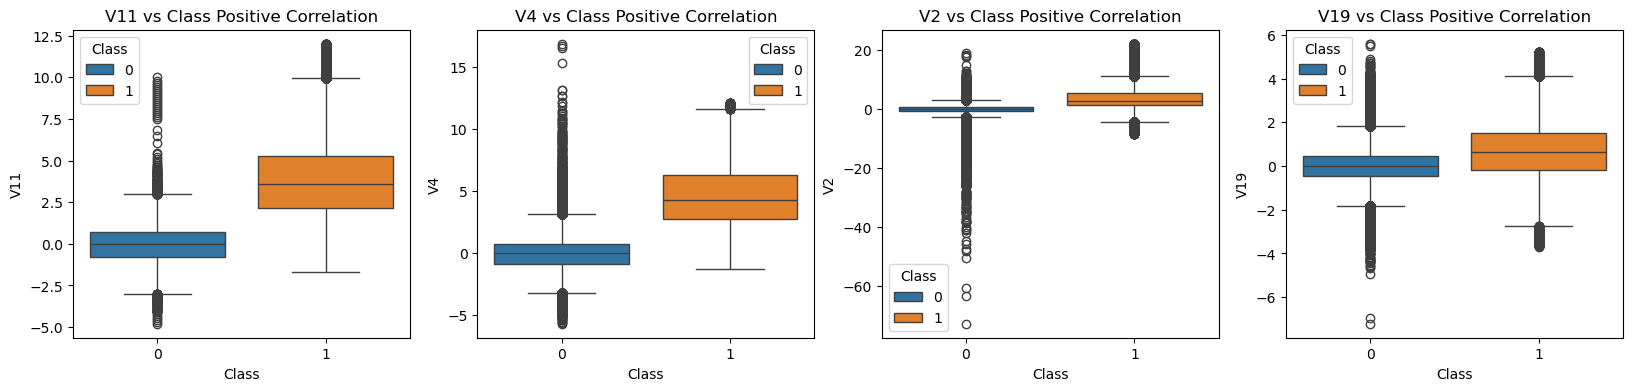

In [12]:
f, axes = plt.subplots(ncols=4, figsize=(20,4))

# Positive correlations (The higher the feature the probability increases that it will be a fraud transaction)
sns.boxplot(x="Class", y="V11", data=X_resampled,  hue="Class", ax=axes[0])
axes[0].set_title('V11 vs Class Positive Correlation')

sns.boxplot(x="Class", y="V4", data=X_resampled,  hue="Class", ax=axes[1])
axes[1].set_title('V4 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V2", data=X_resampled,  hue="Class", ax=axes[2])
axes[2].set_title('V2 vs Class Positive Correlation')


sns.boxplot(x="Class", y="V19", data=X_resampled,  hue="Class", ax=axes[3])
axes[3].set_title('V19 vs Class Positive Correlation')

plt.show()

When plotting these variables, we realised that all 8 variables had many outliers and hence we utilised the outlier removal technique through finding the upper and lower bound via IQR and removing them from the dataset. 

In [13]:
#Cell can be run multiple times to get rid of as many outliers as needed. 

for i in range(1):
    #V14 removing outliers from fraud transactions
    v14_fraud = X_resampled['V14'].loc[X_resampled['Class'] == 1].values
    q25, q75 = np.percentile(v14_fraud, 25), np.percentile(v14_fraud, 75)
    v14_iqr = q75 - q25
    
    v14_cut_off = v14_iqr * 1.5
    v14_lower, v14_upper = q25 - v14_cut_off, q75 + v14_cut_off
    
    outliers = [x for x in v14_fraud if x < v14_lower or x > v14_upper]
    print('Feature V14 Outliers for Fraud Cases: {}'.format(len(outliers)))
    print('V14 outliers: {}'.format(outliers))
    
    X_resampled = X_resampled.drop(X_resampled[(X_resampled['V14'] > v14_upper) | (X_resampled['V14'] < v14_lower)].index)
    
    print('Number of Instances after outliers removal: {}'.format(len(X_resampled)))
    print('----' * 44)
    
    #V12 removing outliers from fraud transactions
    v12_fraud = X_resampled['V12'].loc[X_resampled['Class'] == 1].values
    q25, q75 = np.percentile(v12_fraud, 25), np.percentile(v12_fraud, 75)
    v12_iqr = q75 - q25
    
    v12_cut_off = v12_iqr * 1.5
    v12_lower, v12_upper = q25 - v12_cut_off, q75 + v12_cut_off
    
    outliers = [x for x in v12_fraud if x < v12_lower or x > v12_upper]
    print('Feature V12 Outliers for Fraud Cases: {}'.format(len(outliers)))
    print('V12 outliers: {}'.format(outliers))
    
    X_resampled = X_resampled.drop(X_resampled[(X_resampled['V12'] > v12_upper) | (X_resampled['V12'] < v12_lower)].index)
    
    print('Number of Instances after outliers removal: {}'.format(len(X_resampled)))
    print('----' * 44)
    
    #V10 removing outliers from fraud transactions
    v10_fraud = X_resampled['V10'].loc[X_resampled['Class'] == 1].values
    q25, q75 = np.percentile(v10_fraud, 25), np.percentile(v10_fraud, 75)
    v10_iqr = q75 - q25
    
    v10_cut_off = v10_iqr * 1.5
    v10_lower, v10_upper = q25 - v10_cut_off, q75 + v10_cut_off
    
    outliers = [x for x in v10_fraud if x < v10_lower or x > v10_upper]
    print('Feature V10 Outliers for Fraud Cases: {}'.format(len(outliers)))
    print('V10 outliers: {}'.format(outliers))
    
    X_resampled = X_resampled.drop(X_resampled[(X_resampled['V10'] > v10_upper) | (X_resampled['V10'] < v10_lower)].index)
    
    print('Number of Instances after outliers removal: {}'.format(len(X_resampled)))


Feature V14 Outliers for Fraud Cases: 2460
V14 outliers: [-18.187703007082526, -17.87107224290894, -17.743053612781157, -17.243833359061355, -18.914702061940627, -17.61519156948409, -17.915983710256025, -16.878388022422616, -17.957406495694315, -16.865850762084605, -18.256668542874657, -18.07143907153577, -17.660869892451984, -18.18697399568666, -17.382568181410253, -18.315567245822006, -18.137116407880114, -17.049873916489272, -17.78205524861028, -18.184631268469587, -19.111102413356726, -18.065813146105064, -18.51269138270475, -18.290564437488218, -17.953245895852135, -17.995414900486583, -17.73260707244014, -17.241583529910628, -17.02133594001484, -18.06487922014426, -18.471361941718932, -17.580090979779087, -18.81769441134857, -18.1183641082832, -17.91692427480499, -17.999102391928666, -17.63090646093864, -17.89087299433153, -16.959187439363603, -17.77085638242491, -17.9181457287265, -17.810435003237767, -18.229793475452354, -17.099326907610312, -17.851767561442838, -17.59392891120

This step could have been done multiple times to remove as many outliers however we felt it may take away too much information from the dataset and hence only ran it once.

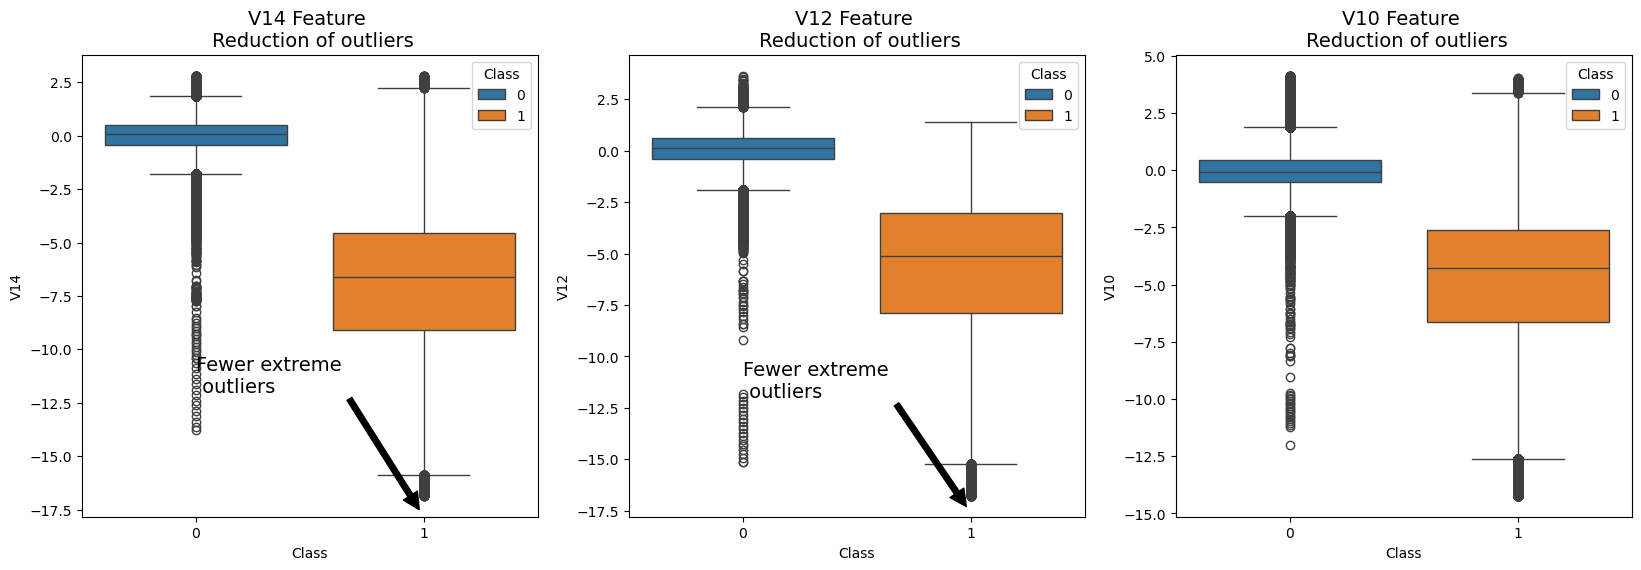

In [14]:
f,(ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20,6))

colors = ['#B3F9C5', '#f9c5b3']
# Boxplots with outliers removed

# Feature V14
sns.boxplot(x="Class", y="V14", data=X_resampled,ax=ax1,  hue="Class")
ax1.set_title("V14 Feature \n Reduction of outliers", fontsize=14)
ax1.annotate('Fewer extreme \n outliers', xy=(0.98, -17.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature 12
sns.boxplot(x="Class", y="V12", data=X_resampled, ax=ax2,  hue="Class")
ax2.set_title("V12 Feature \n Reduction of outliers", fontsize=14)
ax2.annotate('Fewer extreme \n outliers', xy=(0.98, -17.3), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)

# Feature V10
sns.boxplot(x="Class", y="V10", data=X_resampled, ax=ax3,  hue="Class")
ax3.set_title("V10 Feature \n Reduction of outliers", fontsize=14)
ax3.annotate('Fewer extreme \n outliers', xy=(0.95, -16.5), xytext=(0, -12),
            arrowprops=dict(facecolor='black'),
            fontsize=14)


plt.show()

The outputs we got are less fewer extreme outliers. 

Moving on to model building, we first utilised a decision tree model as we it is usually used for classification problems and because of our familiarity with it. 

## 4)Model Building 

### Decision Tree

In [15]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

# Implementing model
X = X_resampled.drop('Class', axis=1)
y = X_resampled['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5],  
    'min_samples_split': [3, 5],  
    'min_samples_leaf': [3, 5]  
}


# Define the decision tree classifier
clf = DecisionTreeClassifier()

# Define GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best estimator to make predictions on test data
y_pred_test = best_estimator.predict(X_test)

# Generate a classification report for test data
report_test = classification_report(y_test, y_pred_test)
print("\nTest Classification Report:")
print(report_test)


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 5}
Best Score: 0.9726746435806014

Test Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     56185
           1       0.98      0.96      0.97     52643

    accuracy                           0.97    108828
   macro avg       0.97      0.97      0.97    108828
weighted avg       0.97      0.97      0.97    108828



However, despite hypertuning with the best variables as seen at the bottom, we found that our model was still overfitted. Hence we decided to try other models that could improve the overfitting whilst still be useful for classification problems such as ours.

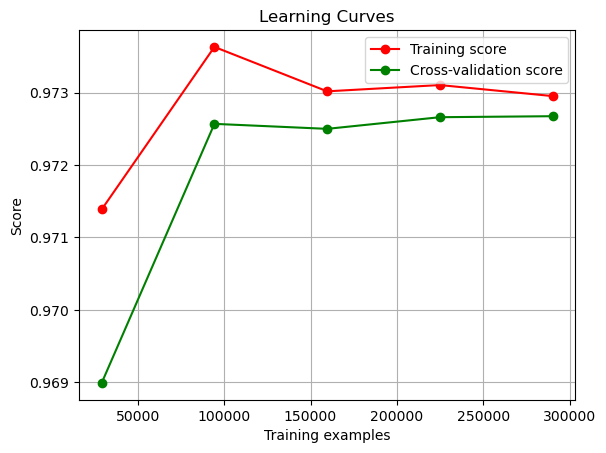

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import learning_curve

# Define a function to plot learning curves
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=-1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    plt.grid()

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Plot learning curve
title = "Learning Curves"
plot_learning_curve(best_estimator, title, X_train, y_train, cv=3)
plt.show()


 Random forest model was similar in nature to a decision tree, however it could not solve our overfitting problem.

### Random Forest


Best Parameters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 5, 'min_samples_split': 3, 'n_estimators': 100}
Best Score: 0.9683466960913362

Test Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.99      0.97     56185
           1       0.99      0.94      0.97     52643

    accuracy                           0.97    108828
   macro avg       0.97      0.97      0.97    108828
weighted avg       0.97      0.97      0.97    108828



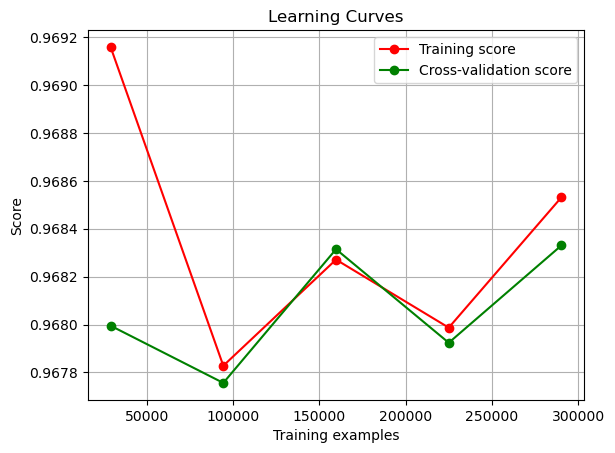

In [17]:
#Random Forest Model
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestClassifier  
from sklearn.metrics import classification_report

param_grid = { 
    'n_estimators' : [100, 120],
    'criterion': ['gini', 'entropy'],
    'max_depth': [3, 5],  
    'min_samples_split': [3, 5],  
    'min_samples_leaf': [3, 5] 
}

# Define the Random Forest classifier
clf = RandomForestClassifier()

# Define GridSearchCV
grid_search = GridSearchCV(estimator=clf, param_grid=param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)
print("Best Score:", best_score)

# Use the best estimator to make predictions on test data
y_pred_test = best_estimator.predict(X_test)

# Generate a classification report for test data
report_test = classification_report(y_test, y_pred_test)
print("\nTest Classification Report:")
print(report_test)

#Random Forest Model check for overfitting 
title = "Learning Curves"
plot_learning_curve(best_estimator, title, X_train, y_train, cv=3)
plt.show()

### Logistic Regression 

Best Parameters for Logistic Regression: {'C': 10, 'penalty': 'l2'}
Best Score for Logistic Regression: 0.9733867860714521

Test Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     56381
           1       0.98      0.96      0.97     52447

    accuracy                           0.98    108828
   macro avg       0.98      0.98      0.98    108828
weighted avg       0.98      0.98      0.98    108828



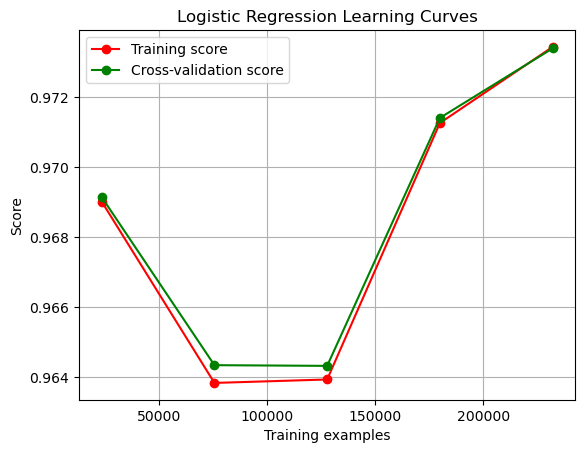

In [33]:
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for logistic regression
logistic_param_grid = {
    'penalty': ['l2'],  # Only 'l2' penalty for 'lbfgs' solver
    'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

# Define the Logistic Regression classifier
logistic_clf = LogisticRegression(solver='lbfgs', max_iter=1000)  # Increase max_iter to avoid convergence warning

# Define GridSearchCV for logistic regression
logistic_grid_search = GridSearchCV(estimator=logistic_clf, param_grid=logistic_param_grid, cv=3, scoring='accuracy', n_jobs=-1)

# Fit GridSearchCV for logistic regression
logistic_grid_search.fit(X_train, y_train)

# Get the best hyperparameters and the best score for logistic regression
logistic_best_params = logistic_grid_search.best_params_
logistic_best_score = logistic_grid_search.best_score_
logistic_best_estimator = logistic_grid_search.best_estimator_

print("Best Parameters for Logistic Regression:", logistic_best_params)
print("Best Score for Logistic Regression:", logistic_best_score)

# Use the best estimator to make predictions on test data for logistic regression
y_pred_test_logistic = logistic_best_estimator.predict(X_test)

# Generate a classification report for test data for logistic regression
report_test_logistic = classification_report(y_test, y_pred_test_logistic)
print("\nTest Classification Report for Logistic Regression:")
print(report_test_logistic)

# Logistic Regression Model check for overfitting 
logistic_title = "Logistic Regression Learning Curves"
plot_learning_curve(logistic_best_estimator, logistic_title, X_train, y_train, cv=3)
plt.show()


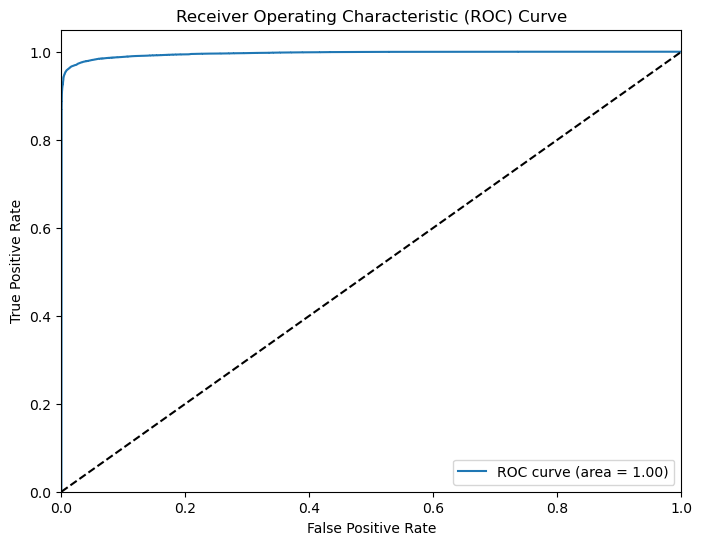

AUC Score: 0.9959281323152558


In [34]:
from sklearn.metrics import roc_auc_score, roc_curve

# Predict probabilities for test data
y_pred_proba_test = logistic_best_estimator.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC score
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba_test)
auc_score = roc_auc_score(y_test, y_pred_proba_test)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='ROC curve (area = {:.2f})'.format(auc_score))
plt.plot([0, 1], [0, 1], 'k--')  # Random guess line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

print("AUC Score:", auc_score)


The logistic regression had an accuracy of 0.98 while having a ROC score of 0.996 which means that the model was very discerning between classes, having a very high TPR over FPR at different thresholds.

We were quite satisfied with the model however we felt that we could do better. The idea then was to utilise a neural network model to help better identify the underlying trends in the dataset to better predict the test set whilst maintaining or even improving the overfitting problem.



# 5)Machine Learning Model

##  Convolutional Neural Network (CNN) 1D sequence 

In [49]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, Flatten, Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score

#Class for getting values later 
class MetricsCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        X_val_reshaped = X_val_scaled.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1], 1)
        y_pred = (self.model.predict(X_val_reshaped) > 0.5).astype("int32")
        val_loss = logs.get('val_loss')
        accuracy = accuracy_score(y_val, y_pred)
        f1 = f1_score(y_val, y_pred)
        print(f"Epoch {epoch+1}: Val Loss = {val_loss:.4f}, Accuracy = {accuracy:.4f}, F1 Score = {f1:.4f}")

# Splitting the data further to get val set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)

# Data Preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

# Reshape data for CNN input
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_val_reshaped = X_val_scaled.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Initialize the model
model = Sequential()

model.add(Conv1D(32, 2, activation='relu', input_shape=X_train_reshaped.shape[1:]))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Conv1D(64, 2, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))
model.summary()

C:\Users\gordo\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Layer (type)                       ┃ Output Shape              ┃        Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ conv1d_20 (Conv1D)                 │ (None, 29, 32)            │             96 │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ batch_normalization_20             │ (None, 29, 32)            │            128 │
│ (BatchNormalization)               │                           │                │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ dropout_30 (Dropout)               │ (None, 29, 32)            │              0 │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ conv1d_21 (Conv1D)                 │ (None, 28, 64)            │          4,160 │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ batch_normalization_21             │ (None, 28, 64)            │            256 │
│ (BatchNormalization)               │                           │                │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ dropout_31 (Dropout)               │ (None, 28, 64)            │              0 │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ flatten_10 (Flatten)               │ (None, 1792)              │              0 │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ dense_20 (Dense)                   │ (None, 64)                │        114,752 │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ dropout_32 (Dropout)               │ (None, 64)                │              0 │
├────────────────────────────────────┼───────────────────────────┼────────────────┤
│ dense_21 (Dense)                   │ (None, 1)                 │             65 │
└────────────────────────────────────┴───────────────────────────┴────────────────┘

 Total params: 119,457 (466.63 KB)

 Trainable params: 119,265 (465.88 KB)

 Non-trainable params: 192 (768.00 B)

Our first Convolution1D layer has 32 filters with a kernel size of 2, enabling it to analyze consecutive data points. The ReLU activation function adds non-linearity by allowing only positive values. Next, the BatchNormalization layer stabilizes data distribution, speeding up training and improving generalization by reducing internal covariate shift. The Dropout layer follows, reducing overfitting by randomly setting some outputs to zero during training. 
We repeat this structure with 64 filters in a second Convolution1D layer for more complex feature extraction.The Flatten layer reshapes the data into a 1-d array for dense layers. <NEXT SLIDE> The dense layers perform classification.The first dense layer uses ReLU for learning complex relationships, while the final dense layer uses a sigmoid activation function for binary classification. This setup allows us to determine the probability of a transaction being fraudulent, with an output between 0 and 1. 
    
The rectified linear unit (ReLU) or rectifier activation function introduces the property of nonlinearity to a deep learning model and solves the vanishing gradients issue. It interprets the positive part of its argument. It is one of the most popular activation functions in deep learning.


In [50]:
# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model with callbacks
history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=100, validation_data=(X_val_reshaped, y_val), callbacks=[MetricsCallback()])

Epoch 1/20
2721/2721 ━━━━━━━━━━━━━━━━━━━━ 4s 1ms/step
Epoch 1: Val Loss = 0.0196, Accuracy = 0.9955, F1 Score = 0.9954
3483/3483 ━━━━━━━━━━━━━━━━━━━━ 24s 7ms/step - accuracy: 0.9748 - loss: 0.0771 - val_accuracy: 0.9955 - val_loss: 0.0196
Epoch 2/20
2721/2721 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step
Epoch 2: Val Loss = 0.0106, Accuracy = 0.9971, F1 Score = 0.9970
3483/3483 ━━━━━━━━━━━━━━━━━━━━ 30s 9ms/step - accuracy: 0.9894 - loss: 0.0322 - val_accuracy: 0.9971 - val_loss: 0.0106
Epoch 3/20
2721/2721 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step
Epoch 3: Val Loss = 0.0069, Accuracy = 0.9980, F1 Score = 0.9979
3483/3483 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - accuracy: 0.9920 - loss: 0.0247 - val_accuracy: 0.9980 - val_loss: 0.0069
Epoch 4/20
2721/2721 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step
Epoch 4: Val Loss = 0.0064, Accuracy = 0.9984, F1 Score = 0.9983
3483/3483 ━━━━━━━━━━━━━━━━━━━━ 27s 8ms/step - accuracy: 0.9930 - loss: 0.0209 - val_accuracy: 0.9984 - val_loss: 0.0064
Epoch 5/20
2721/2721 ━━━━━━━━━━━━━━━━━━━━ 4s

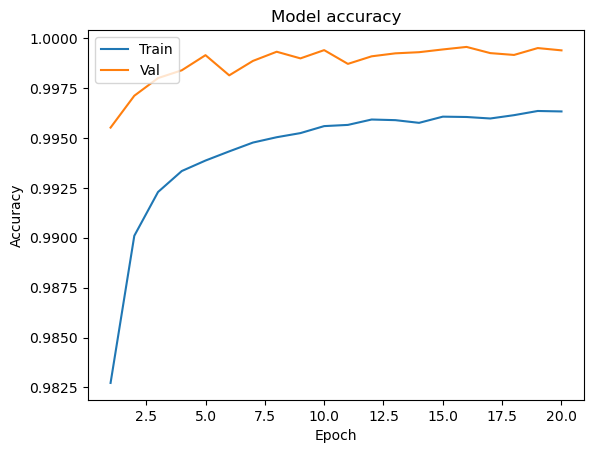

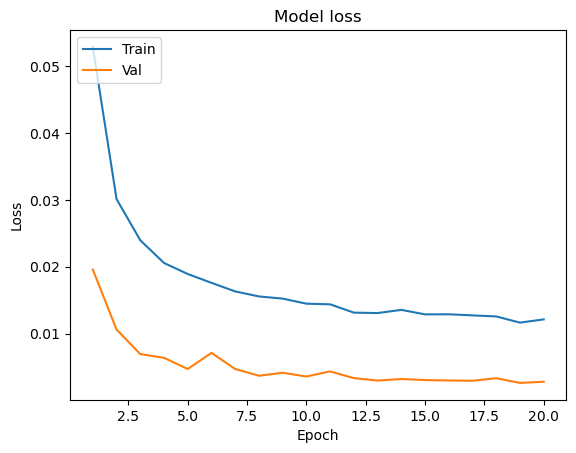

In [51]:
#Checking for Overfitting 

def plot_learningCurve(history, epoch):
  # Plot training & validation accuracy values
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

  # Plot training & validation loss values
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'Val'], loc='upper left')
  plt.show()

#Check for overfitting 
plot_learningCurve(history, 20)

In [52]:
# Prediction
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test_reshaped, y_test)

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_accuracy:.4f}")


3401/3401 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9993 - loss: 0.0026
Test Loss: 0.0028
Test Accuracy: 0.9993


The results we got from our CNN model achieved a high accuracy rate of 0.993 in predicting whether a credit card transaction is fraudulent. It also had a low test loss, indicating that the model generalizes well to unseen data. The small deviations between the training and validation (test) set data suggest that the model is not overfitting.

## 6)Statistical Analysis 

Although both logistic regression and CNN models achieved high test accuracy in classifying credit card transactions as fraudulent or legitimate, the results from the CNN model demonstrated a higher accuracy score, indicating its superior capability in complex pattern recognition tasks like credit card fraud detection. Here are some of the recommendations we made based on the results we got.

### Recommendations 

-SMOTE then RUS

With credit card fraud detection, the dataset is often highly unbalanced. To address this, we recommend processing the data using oversampling and undersampling methods, which help compensate for the imbalance. SMOTE, an oversampling method, synthesizes new minority samples by leveraging k-nearest neighbors. Conversely, RUS, an undersampling method, removes some data points from the majority class to reduce bias. The combination of SMOTE followed by RUS has yielded the best results, achieving an ROC score of 1, indicating optimal performance.

-Convolutional Neural Network (CNN) 1D sequence 

We recommend using the CNN model as it was slightly better than logistic regression, thanks to its sophisticated processing of information without compromising on quality and integrity. The use of multiple convolutional layers allows for progressively more complex feature extraction, leading to higher accuracy levels.
Together, these components create a robust system capable of effectively detecting credit card fraud by combining feature extraction, normalization, dropout, and dense layers.


### Future Recommendations

An improvement we could make to our convolutional structure is adding a MaxPooling1D layer, which reduces the spatial dimensions of the data while retaining key features.

What are the benefits?

MaxPooling1D reduces computational complexity, leading to faster training and prediction times—critical for large datasets and real-time fraud detection. It also boosts accuracy by emphasizing high-variance signals, helping to detect fraudulent patterns. Additionally, it reduces overfitting by simplifying data, enhancing generalization to unseen cases. These advantages make MaxPooling1D a valuable addition to our CNN-based credit card fraud detection model, improving efficiency and accuracy.


## Conclusions

Through our machine learning model, banks can more effectively and accurately detect credit card fraud, reducing the occurrence of false positives that lead to incorrect freezing of customer accounts, causing significant inconvenience. This not only disrupts customers' daily activities but can also lead to financial losses, as they are unable to make transactions. By detecting fraud early and accurately, the model can reduce the financial impact on both the bank and the affected customers. Our model supports automated fraud detection, minimizing the need for manual investigations. This contributes to increased work efficiency and allows bank staff to focus on more complex tasks.